### Auto ARIMA
  * #### 데이터 분석과 Decomposition 등을 통해서 탐색할 범위를 지정합니다
  * ARIMA p, d, q 차수를 지정한 범위 내에서 성능을 비교하여 자동으로 선정합니다
  * Seasonality data도 처리할 수 있습니다 - SARIMA

### 데이터 로드
* train, test data를 8:2 정도로 구분합니다
* 데이터를 시각화합니다

In [26]:
from matplotlib import pyplot
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
# 데이터 로드
sales_data = pd.read_csv('./data/Champagne_Sales.csv')

In [28]:
sales_data.dtypes

Month              object
Champagne sales     int64
dtype: object

In [29]:
sales_data.head()

,Month,Champagne sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [30]:
# DataFrame 'Month' 컬럼을 Datetime 타입으로 변경
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

In [31]:
sales_data.dtypes

Month              datetime64[ns]
Champagne sales             int64
dtype: object

In [32]:
sales_data.head()

,Month,Champagne sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [33]:
# 'Month' 컬럼에 인덱스 부여
sales_data.set_index('Month', inplace=True)

In [34]:
# train data와 test data로 분리
train_data = sales_data[:85]
test_data = sales_data[-20:]

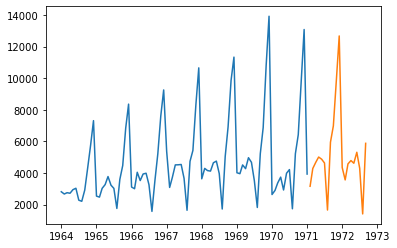

In [35]:
pyplot.plot(train_data)
pyplot.plot(test_data)
pyplot.show()

### train data 분석
  * pmdarima.arima.ADFTest를 이용한 Stationary 여부 확인

In [36]:
# stationaly 확인
from pmdarima.arima import ADFTest

In [37]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(train_data)

(0.01, False)

### Auto ARIMA 탐색 범위 설정
  * Auto ARIMA 학습을 진행합니다
  
  * ARIMA 차수 p : 0 ~ 5
  * ARIMA 차수 d : 1 고정
  * ARIMA 차수 q : 0 ~ 5
  * Seasonality 차수 P : 0 ~ 5
  * Seasonality 차수 D : 1 고정
  * Seasonality 차수 Q : 0 ~ 5
  * Seasonality 간격 m : 12 (이 경우는 년 단위 반복)

In [38]:
# Auto ARIMA 모델 학습
from pmdarima.arima import auto_arima

In [39]:
warnings.filterwarnings('ignore')
arima_model =  auto_arima(
    # ARIMA 차수
    train_data, 
    start_p=0, d=1, start_q=0, # ARIMA 차수 d : 1로 고정
    max_p=5, max_d=5, max_q=5, 
    
    # Seasonality 차수
    start_P=0, D=1, start_Q=0, # Seasonality 차수 d : 1로 고정
    max_P=5, max_D=5,max_Q=5,
    m=12, # window = 12
    seasonal=True,
    
    # 기타 옵션
    error_action='warn',
    trace = True,
    supress_warnings=True,
    stepwise = True,
    random_state=20,
    n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.33 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.50 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.16 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.31 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.655, Time=1.21 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.32 sec
 ARIMA(1,1,3)(0,1,0)[12]     

### ARIMA(1, 1, 2)(0, 1, 0)[12] 로 결정
  * Seasonality를 반영한 모델입니다 - SARIMAX

In [48]:
# 모델 요약
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Sun, 27 Sep 2020   AIC                           1174.564
Time:                                     14:55:58   BIC                           1183.670
Sample:                                          0   HQIC                          1178.189
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.543      0.000      -1.139      -0.544
ma.L1          0.0513      0.167      0.308      0.758      -0.275       0.378
ma.L2         -0.8673      0.086    -10.135      0.000      -1.035      -0.700
sigma2      5.862e+05   7.03e+04      8.342      0.000    4.48e+05    7.24e+05
===================================================================================
Ljung-Box (Q):                       49.92   Jarque-Bera (JB):                 8.55
Prob(Q):                              0.14   Prob(JB):                         0.01
Heteroskedasticity (H):               2.61   Skew:                            -0.10
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 예측 및 성능 평가
  * test data를 통해 모델을 예측하고 평가합니다
  * R-squared 값 1은 완벽하게 예측하는 경우입니다

In [53]:
# predict : next 20 steps
predict_result = arima_model.predict(n_periods = 20)

prediction = pd.DataFrame(predict_result,index=test_data.index)
prediction.columns = ['predicted_sales']
prediction

,predicted_sales
Month,
1971-02-01,2746.654198
1971-03-01,3247.972788
1971-04-01,3592.469382
1971-05-01,2800.922349
1971-06-01,3841.876532
1971-07-01,4088.056321
1971-08-01,1596.287379
1971-09-01,5090.028363
1971-10-01,6283.993257


### 데이터 시각화
  * train, test, predicted data를 시각화합니다
  * SARIMA는 Seasonality를 반영하기 때문에 비교적 test data와 predicted data가 일치합니다

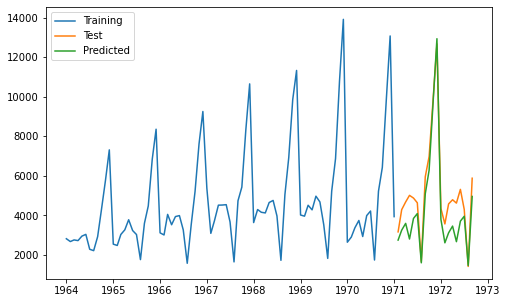

In [54]:
pyplot.figure(figsize=(8,5))
pyplot.plot(train_data, label="Training")
pyplot.plot(test_data, label="Test")
pyplot.plot(prediction, label="Predicted")
pyplot.legend(loc = 'upper left')
pyplot.show()

### 오차 및 R2 Score
  * math의 sqrt() 함수와 scikit-learn 모듈을 이용하여 RMSE를 구합니다
  * scikit-learn.metric.r2_score 함수를 이용해 R2 Score를 구합니다
  * ㄱ

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate forecasts
rmse = sqrt(mean_squared_error(test_data, prediction))
print('RMSE: %.3f' % rmse)

RMSE: 1060.233


In [52]:
from sklearn.metrics import r2_score

r2_score_ret = r2_score(test_data, prediction)
print('R2 Score: %.5f' % r2_score_ret)

R2 Score: 0.81148
